## Plot number of novel verb-particle constructions per decade

In [18]:

def load_vpc_to_year(data_path="vpc_corpus.csv"):
    vpc_to_year = {}
    with open(data_path, "r") as f: 
        for line in f:
            line = line.split() 
            curr_vpc = (line[0], line[1])
            first_occurrence = int(line[3])
            vpc_to_year[curr_vpc] = first_occurrence
    return vpc_to_year


def load_vpc_to_frequency(data_path="vpc_corpus.csv"):
    vpc_to_freq = {}
    with open(data_path, "r") as f: 
        for line in f:
            line = line.split() 
            curr_vpc = (line[0], line[1])
            frequency = int(line[2])
            vpc_to_freq[curr_vpc] = frequency
    return vpc_to_freq

            
vpc_to_year = load_vpc_to_year()
vpc_to_freq = load_vpc_to_frequency()

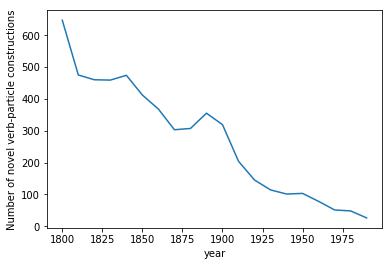

In [17]:


def plot_by_year(vpc_to_year):
    year_counter = Counter(list(vpc_to_year.values()))
    years = list(range(1800, 2000, 10))
    occurrences = [year_counter[year] for year in years]
    plt.plot(years, occurrences)
    
    plt.xlabel("year")
    plt.ylabel("Number of novel verb-particle constructions")


plot_by_year(vpc_to_year)

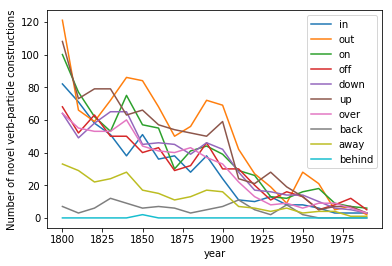

In [14]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt


def plot_by_particle(vpc_to_year):
    particle_to_year = defaultdict(Counter)
    for (curr_v, curr_p), curr_year in vpc_to_year.items():
        particle_to_year[curr_p].update([curr_year])
        
    years = list(range(1800, 2000, 10))
    for particle, year_counter in particle_to_year.items():
        occurrences = [year_counter[year] for year in years]
        plt.plot(years, occurrences, label=particle)
        
    plt.xlabel("year")
    plt.ylabel("Number of novel verb-particle constructions")
    plt.legend()
            
    
plot_by_particle(vpc_to_year)

## Examine novel verb-particle constructions per decade

In [38]:
import random


def get_vpcs_by_decade(
        vpc_to_year, vpc_to_freq, decade, random_shuffle=False, n_samples=10):
    vpc_freqs = [(vpc, freq) for vpc, freq in vpc_to_freq.items()
                 if vpc_to_year[vpc] == decade]
    if random_shuffle:
        random.shuffle(vpc_freqs)
    else:
        vpc_freqs = sorted(vpc_freqs, key=lambda x: x[1], reverse=True)
    result = [" ".join(item[0]) for item in vpc_freqs]
    return result[:n_samples]

In [40]:
# Most frequent VPCs per decade

for decade in range(1800, 2000, 10):
    print(decade, ", ".join(get_vpcs_by_decade(vpc_to_year, vpc_to_freq, decade)))

1800 back up, sort out, shut down, show off, straighten out, act out, see off, leave over, pin down, straighten up
1810 spell out, line up, heat up, sign up, start over, knock over, climb out, flatten out, wait out, step down
1820 wash up, end up, split up, face up, focus on, level off, loosen up, drift off, mop up, sign on
1830 calm down, cancel out, top off, reach up, smooth out, hand back, ask out, finish up, flare up, tip over
1840 rule out, track down, switch off, catch on, doze off, crop up, win out, climb down, blurt out, crack up
1850 check out, head out, pop up, tighten up, head on, settle out, bog down, rest up, water down, chew up
1860 mess up, join up, black out, touch down, seal off, start down, sober up, dream up, ease up, palm down
1870 contract out, palm up, size up, slow up, nod off, log out, balance out, soften up, chew on, peter out
1880 switch on, trail off, peek out, chill out, link up, bump off, liven up, hunch up, palm out, plug in
1890 piss off, log on, phase ou

In [41]:
# Random frequent VPCs per decade

for decade in range(1800, 2000, 10):
    print(decade, ",".join(get_vpcs_by_decade(vpc_to_year, vpc_to_freq, decade, random_shuffle=True)))

1800 pant up,spirit up,harrow in,lock out,recline on,shear away,pull away,wash in,bridge over,preside over
1810 shuffle away,brake up,cough down,dust off,copy off,sweep away,waste on,devise over,put back,shape up
1820 vault over,swagger off,stuff out,grumble on,wish down,lumber down,stray away,clamber down,thrust up,deal on
1830 cross in,escort up,guess out,sign off,knot up,mat down,smack off,mean out,totter up,crawl away
1840 root on,sot off,store away,patch over,powder over,spill out,post off,flush out,exclaim over,scramble down
1850 hail down,slough away,delve in,prance on,tug off,seam up,foam over,wrack away,part over,sprawl out
1860 forge down,hesitate over,revel over,plate over,empty down,suffer out,harry out,silt over,gie up,blossom in
1870 scar up,embody in,charge down,trot over,spoon down,goin out,whiz down,clamber in,shriek in,strain up
1880 heart out,ink up,shamble out,coo over,total up,progress up,pivot on,house out,compute in,lean up
1890 amble on,snug down,flounder up,sco